## Feature Extraction, New and Improved

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from pathlib import Path
from sklearn.model_selection import train_test_split
from pydub import AudioSegment
from scipy.fftpack import fft, dct

## Using audio data 

In [2]:
samples, sample_rate = librosa.load('../../../Source/Clean_train_clips/Shuffle/1/1.wav')

**Visualize audio files with librosa**

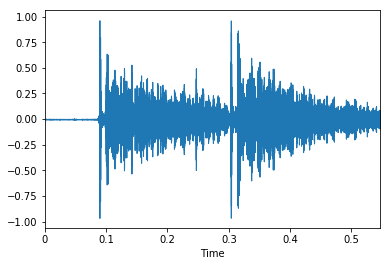

In [3]:
librosa.display.waveplot(samples, sr=sample_rate)

### Feature: 
BPM

Let's try it with a longer sample with a known BPM.

In [4]:
# Estimate a static tempo
y, sr = librosa.load( '../../../workout.wav')
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo.item() #according to song BPM the correct tempo is 174 BPM

117.45383522727273

In [5]:
# Maybe it's not a static tempo

# But rather a dynamic tempo
dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr,
                            aggregate=None)
dtempo

array([ 86.1328125 ,  86.1328125 ,  86.1328125 , ..., 112.34714674,
       112.34714674, 112.34714674])

Now with short, tap sample.

In [6]:
# Estimate a static tempo
#y, sr = librosa.load('../../../Source/Clean_train_clips/Ball_change/6/1.wav')
y, sr = librosa.load('../../../Source/Shuffle/1/1.wav')
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo 

array([258.3984375])

**This could be a promising feature.**

### Other (maybe useful) stuff from librosa

In [7]:
y, sr = librosa.load('../../../Source/Shuffle/1/1.wav', mono=False)
y.shape # Check mono or stereo

(29400,)

In [8]:
librosa.core.get_duration(y =y, sr=sr) # Get duration in seconds

1.3333333333333333

## Trying out new features

**Short-time Fourier transform (STFT)**

In [ ]:
def get_features_stft (path):
        y, sr = librosa.load(path)
        return np.mean(np.abs(librosa.stft(y)))

In [ ]:
y, sr = librosa.load('../../../Source/Shuffle/1/1.wav')
D = np.abs(librosa.stft(y))
D.shape, D
librosa.display.specshow(D);

In [ ]:
# Using left-aligned frames
D_left = np.abs(librosa.stft(y, center=False))
D_left.shape, D_left
librosa.display.specshow(D_left);

In [ ]:
# Using a shorter hop length
D_short = np.abs(librosa.stft(y, hop_length=64))
D_short.shape, D_short
librosa.display.specshow(D_short);

**Fast Fourier Transform**

In [ ]:
y, sr = librosa.load('../../../Source/Shuffle/1/1.wav')
fftrans = fft(y).real
fftrans.shape, fftrans

In [ ]:
def get_features_fft(path):
    y, sr = librosa.load(path)
    return np.mean(fft(y).real)

**Discrete Cosine Transform**

In [ ]:
y, sr = librosa.load('../../../Source/Shuffle/1/1.wav')
dctrans = dct(y) #dct(y, 1)
dctrans.shape, dctrans


In [ ]:
def get_features_dct(path):
    y, sr = librosa.load(path)
    return np.mean(dct(y))

### Feature:
Mel-frequency cepstral coefficients 

In [9]:
n_mfcc = 20   #Remember to change file path at end of nb

In [10]:
# Extract mfcc feature from data
mfccs = np.mean(librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc).T,axis=0) 

In [11]:
len(mfccs)
#librosa.display.specshow(librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc))

20

### Repeat for all data (Organize in a DataFrame)

In [12]:
def build_list(step, folder, length):
    i = 1
    step_list = []
    while i <= length :
        name = step + "/" + str(folder) + "/" +str(i) + ".wav"
        step_list.append(name)
        i += 1
    return step_list

def get_label(path):
    if path.parts[-3] == 'Shuffle':
        return 1
    else:
        return 0

In [13]:
shuffle_col, bc_col, path_col = [], [], []

In [14]:
pathlist = Path('../../../Source/Clean_train_clips/Shuffle').glob('**/*.wav')
for path in pathlist:
    shuffle_col.append(path)
    shuffle_col.sort()

In [15]:
pathlist = Path('../../../Source/Clean_train_clips/Ball_change').glob('**/*.wav')
for path in pathlist:
    bc_col.append(path)
    bc_col.sort()

In [16]:
path_col = shuffle_col + bc_col

** Add file paths**

In [17]:
tap = pd.DataFrame({'Path':path_col})
tap

Path
0     ../../../Source/Clean_train_clips/Shuffle/1/1.wav
1     ../../../Source/Clean_train_clips/Shuffle/1/10...
2     ../../../Source/Clean_train_clips/Shuffle/1/10...
3     ../../../Source/Clean_train_clips/Shuffle/1/10...
4     ../../../Source/Clean_train_clips/Shuffle/1/10...
5     ../../../Source/Clean_train_clips/Shuffle/1/11...
6     ../../../Source/Clean_train_clips/Shuffle/1/11...
7     ../../../Source/Clean_train_clips/Shuffle/1/11...
8     ../../../Source/Clean_train_clips/Shuffle/1/11...
9     ../../../Source/Clean_train_clips/Shuffle/1/12...
10    ../../../Source/Clean_train_clips/Shuffle/1/12...
11    ../../../Source/Clean_train_clips/Shuffle/1/12...
12    ../../../Source/Clean_train_clips/Shuffle/1/12...
13    ../../../Source/Clean_train_clips/Shuffle/1/13...
14    ../../../Source/Clean_train_clips/Shuffle/1/13...
15    ../../../Source/Clean_train_clips/Shuffle/1/13...
16    ../../../Source/Clean_train_clips/Shuffle/1/13...
17    ../../../Source/Clean_train_clips/Shuffle/1/1_...
18    ../../../Source/Clean_train_clips/Shuffle/1/1_...
19    ../../../Source/Clean_train_clips/Shuffle/1/1_...
20    ../../../Source/Clean_train_clips/Shuffle/1/2.wav
21    ../../../Source/Clean_train_clips/Shuffle/1/2_...
22    ../../../Source/Clean_train_clips/Shuffle/1/2_...
23    ../../../Source/Clean_train_clips/Shuffle/1/2_...
24    ../../../Source/Clean_train_clips/Shuffle/1/3.wav
25    ../../../Source/Clean_train_clips/Shuffle/1/3_...
26    ../../../Source/Clean_train_clips/Shuffle/1/3_...
27    ../../../Source/Clean_train_clips/Shuffle/1/3_...
28    ../../../Source/Clean_train_clips/Shuffle/1/4.wav
29    ../../../Source/Clean_train_clips/Shuffle/1/4_...
...                                                 ...
1218  ../../../Source/Clean_train_clips/Ball_change/...
1219  ../../../Source/Clean_train_clips/Ball_change/...
1220  ../../../Source/Clean_train_clips/Ball_change/...
1221  ../../../Source/Clean_train_clips/Ball_change/...
1222  ../../../Source/Clean_train_clips/Ball_change/...
1223  ../../../Source/Clean_train_clips/Ball_change/...
1224  ../../../Source/Clean_train_clips/Ball_change/...
1225  ../../../Source/Clean_train_clips/Ball_change/...
1226  ../../../Source/Clean_train_clips/Ball_change/...
1227  ../../../Source/Clean_train_clips/Ball_change/...
1228  ../../../Source/Clean_train_clips/Ball_change/...
1229  ../../../Source/Clean_train_clips/Ball_change/...
1230  ../../../Source/Clean_train_clips/Ball_change/...
1231  ../../../Source/Clean_train_clips/Ball_change/...
1232  ../../../Source/Clean_train_clips/Ball_change/...
1233  ../../../Source/Clean_train_clips/Ball_change/...
1234  ../../../Source/Clean_train_clips/Ball_change/...
1235  ../../../Source/Clean_train_clips/Ball_change/...
1236  ../../../Source/Clean_train_clips/Ball_change/...
1237  ../../../Source/Clean_train_clips/Ball_change/...
1238  ../../../Source/Clean_train_clips/Ball_change/...
1239  ../../../Source/Clean_train_clips/Ball_change/...
1240  ../../../Source/Clean_train_clips/Ball_change/...
1241  ../../../Source/Clean_train_clips/Ball_change/...
1242  ../../../Source/Clean_train_clips/Ball_change/...
1243  ../../../Source/Clean_train_clips/Ball_change/...
1244  ../../../Source/Clean_train_clips/Ball_change/...
1245  ../../../Source/Clean_train_clips/Ball_change/...
1246  ../../../Source/Clean_train_clips/Ball_change/...
1247  ../../../Source/Clean_train_clips/Ball_change/...

[1248 rows x 1 columns]

** Add labels**

In [18]:
tap['Labels'] = [get_label(tap.loc[idx,'Path']) for idx in range(len(tap))]

**Add Features: MFCCs**

In [21]:
def get_features_mfcc(path):
    samples, sample_rate = librosa.load(path)
    mfccs = np.mean(librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc).T,axis=0)
    return mfccs

In [22]:
for i in range (n_mfcc):
    tap[str(i)] = [get_features_mfcc(tap.loc[idx, 'Path'])[i] for idx in range (len(tap))]

In [23]:
tap.head()

Path  Labels           0  \
0  ../../../Source/Clean_train_clips/Shuffle/1/1.wav       1 -152.435155   
1  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -143.991075   
2  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -111.612287   
3  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -124.765927   
4  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -171.803904   

           1           2          3         4          5          6         7  \
0  78.311769 -106.482258  40.668131 -6.848575 -13.537377 -25.102485  6.754208   
1  65.523449 -102.436753  32.133732 -7.930019  -3.615873 -29.871724 -0.182348   
2  38.485560  -82.105803  20.092784  4.521734 -11.397102 -17.515387 -4.323631   
3  59.099908 -107.706609  34.986722 -7.126354  -4.114656 -28.856100  0.194913   
4  61.124764 -105.591733  32.832019 -7.868860  -2.751917 -29.451636  0.423611   

     ...            10         11        12        13         14        15  \
0    ...    -18.794214  -9.100824 -3.329641 -9.682083 -10.265548 -2.854873   
1    ...    -20.080337 -12.818014 -1.179643 -8.972827 -13.680871 -0.441789   
2    ...    -14.350838 -13.162733  2.241935 -9.635265 -11.721482  0.729660   
3    ...    -19.339707 -13.854616 -1.720148 -9.828810 -14.683264 -0.436352   
4    ...    -20.465516 -14.246567 -1.306208 -9.365910 -13.807159 -0.393419   

         16         17        18        19  
0 -2.821410 -11.892168 -1.505338 -2.087528  
1 -5.826206 -15.578982 -4.161982 -2.657234  
2 -4.075102 -13.519880 -2.646125 -1.819422  
3 -6.158605 -14.315085 -3.680532 -3.380997  
4 -5.879256 -15.103948 -3.742887 -3.202471  

[5 rows x 22 columns]

** Add Features: Tempo**

In [24]:
def get_features_bpm(path):
    samples, sample_rate = librosa.load(path)
    onset_env = librosa.onset.onset_strength(samples, sr=sample_rate)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sample_rate)
    return tempo.item()

In [25]:
tap['BPM'] = [get_features_bpm(tap.loc[idx, 'Path']) for idx in range (len(tap))]

In [26]:
tap.head()

Path  Labels           0  \
0  ../../../Source/Clean_train_clips/Shuffle/1/1.wav       1 -152.435155   
1  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -143.991075   
2  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -111.612287   
3  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -124.765927   
4  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -171.803904   

           1           2          3         4          5          6         7  \
0  78.311769 -106.482258  40.668131 -6.848575 -13.537377 -25.102485  6.754208   
1  65.523449 -102.436753  32.133732 -7.930019  -3.615873 -29.871724 -0.182348   
2  38.485560  -82.105803  20.092784  4.521734 -11.397102 -17.515387 -4.323631   
3  59.099908 -107.706609  34.986722 -7.126354  -4.114656 -28.856100  0.194913   
4  61.124764 -105.591733  32.832019 -7.868860  -2.751917 -29.451636  0.423611   

      ...             11        12        13         14        15        16  \
0     ...      -9.100824 -3.329641 -9.682083 -10.265548 -2.854873 -2.821410   
1     ...     -12.818014 -1.179643 -8.972827 -13.680871 -0.441789 -5.826206   
2     ...     -13.162733  2.241935 -9.635265 -11.721482  0.729660 -4.075102   
3     ...     -13.854616 -1.720148 -9.828810 -14.683264 -0.436352 -6.158605   
4     ...     -14.246567 -1.306208 -9.365910 -13.807159 -0.393419 -5.879256   

          17        18        19         BPM  
0 -11.892168 -1.505338 -2.087528  258.398438  
1 -15.578982 -4.161982 -2.657234  215.332031  
2 -13.519880 -2.646125 -1.819422  215.332031  
3 -14.315085 -3.680532 -3.380997  215.332031  
4 -15.103948 -3.742887 -3.202471  123.046875  

[5 rows x 23 columns]

** Add features: zero-crossing rate**

In [27]:
y, sr = librosa.load('../../../Source/Clean_train_clips/Shuffle/1/12.wav')
zero_rate = librosa.feature.zero_crossing_rate(y)
zero_rate.shape[1]

27

In [28]:
samples, sample_rate = librosa.load('../../../Source/Clean_train_clips/Shuffle/1/10.wav')
avg_zcr = np.mean(librosa.feature.zero_crossing_rate(y=samples).T,axis=0)
zcrs= librosa.feature.zero_crossing_rate(samples)

print((librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc)).shape)
print(zcrs.shape)
print(np.mean(librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc).T,axis=0).shape)
print(avg_zcr.shape)

(20, 26)
(1, 26)
(20,)
(1,)


In [29]:
def get_features_ZCR(path):
    samples, sample_rate = librosa.load(path)
    return np.mean(librosa.feature.zero_crossing_rate(y=samples).T,axis=0).item()

In [30]:
tap['ZCR'] = [get_features_ZCR(tap.loc[idx, 'Path']) for idx in range (len(tap))]

** Add features: root mean square energy value**

In [31]:
def get_features_rmse(path):
    samples, sample_rate = librosa.load(path)
    return np.mean(librosa.feature.rmse(y=samples).T,axis=0).item()

In [32]:
tap['RMSE'] = [get_features_rmse(tap.loc[idx, 'Path']) for idx in range (len(tap))]

** Add features: short term energy**

In [33]:
def get_features_ste(path):
    hop_length = 125
    frame_length = 250
    samples, sample_rate = librosa.load(path)
    energy = np.array([sum(abs(samples[i:i+frame_length]**2))for i in range(0, len(samples), hop_length)])
    return np.mean(energy.T)

In [34]:
tap['STE'] = [get_features_ste(tap.loc[idx, 'Path']) for idx in range (len(tap))]

**Add features: Short-time Fourier Transform**

In [ ]:
#tap['STFT'] = [get_features_stft(tap.loc[idx, 'Path']) for idx in range (len(tap))]

**Add features: Fast Fourier Transform**

In [ ]:
#tap['FFT'] = [get_features_fft(tap.loc[idx, 'Path']) for idx in range (len(tap))]

**Add features: Discrete cosine transform**

In [ ]:
#tap['DCT'] = [get_features_dct(tap.loc[idx, 'Path']) for idx in range (len(tap))]

### Pimped out DataFrame

In [35]:
tap.head()

Path  Labels           0  \
0  ../../../Source/Clean_train_clips/Shuffle/1/1.wav       1 -152.435155   
1  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -143.991075   
2  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -111.612287   
3  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -124.765927   
4  ../../../Source/Clean_train_clips/Shuffle/1/10...       1 -171.803904   

           1           2          3         4          5          6         7  \
0  78.311769 -106.482258  40.668131 -6.848575 -13.537377 -25.102485  6.754208   
1  65.523449 -102.436753  32.133732 -7.930019  -3.615873 -29.871724 -0.182348   
2  38.485560  -82.105803  20.092784  4.521734 -11.397102 -17.515387 -4.323631   
3  59.099908 -107.706609  34.986722 -7.126354  -4.114656 -28.856100  0.194913   
4  61.124764 -105.591733  32.832019 -7.868860  -2.751917 -29.451636  0.423611   

     ...            14        15        16         17        18        19  \
0    ...    -10.265548 -2.854873 -2.821410 -11.892168 -1.505338 -2.087528   
1    ...    -13.680871 -0.441789 -5.826206 -15.578982 -4.161982 -2.657234   
2    ...    -11.721482  0.729660 -4.075102 -13.519880 -2.646125 -1.819422   
3    ...    -14.683264 -0.436352 -6.158605 -14.315085 -3.680532 -3.380997   
4    ...    -13.807159 -0.393419 -5.879256 -15.103948 -3.742887 -3.202471   

          BPM       ZCR      RMSE       STE  
0  258.398438  0.183553  0.113765  3.927907  
1  215.332031  0.187988  0.105637  3.369918  
2  215.332031  0.237868  0.106001  3.373906  
3  215.332031  0.187538  0.106388  3.366737  
4  123.046875  0.204491  0.075551  1.817998  

[5 rows x 26 columns]

### Split into train and test sets

In [36]:
X = tap.drop(['Labels'], axis =1)
y = tap[['Labels']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [38]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [39]:
#X_train.to_csv('../../../Source/Data/X_train_audio_augmented.csv', index=None)
#y_train.to_csv('../../../Source/Data/y_train_audio_augmented.csv', index=None)
#X_test.to_csv('../../../Source/Data/X_test_audio_augmented.csv', index=None)
#y_test.to_csv('../../../Source/Data/y_test_audio_augmented.csv', index=None)
#

In [40]:
#tap.to_csv('../../../Source/Data/audio_data_augmented.csv', index=None)